In [8]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

## Análisis de componentes principales

En esta práctica, realizamos PCA en el conjunto de datos ${\tt USArrests}$. Las filas del conjunto de datos contienen los 50 estados, en orden alfabético:

In [10]:
df = pd.read_csv('data/USArrests.csv', index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


Las columnas del conjunto de datos contienen cuatro variables relacionadas con varios delitos:

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


Comencemos echando un vistazo rápido a las medias de columna de los datos:

In [12]:
df.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

Vemos de inmediato que los datos tienen medias **muy** diferentes. También podemos examinar las varianzas de las cuatro variables:

In [13]:
df.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

No es sorprendente que las variables también tengan variaciones muy diferentes: el
La variable ${\tt UrbanPop}$ mide el porcentaje de la población en cada estado,
viviendo en un área urbana, que no es un número comparable al número
de delitos cometidos en cada estado por cada 100.000 personas. Si no pudimos escalar el
variables antes de realizar PCA, la mayoría de los componentes principales
que observamos sería impulsada por la variable ${\tt Assault}$, ya que tiene por
mucho, la media y la varianza más grandes.

Por tanto, es importante estandarizar variables para tener media cero y desviación estándar 1 antes de realizar PCA. Podemos hacer esto usando la función ${\tt scale()}$ de ${\tt sklearn}$:

In [14]:
from sklearn.preprocessing import scale
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)

Ahora usaremos la función ${\tt PCA()}$ de ${\tt sklearn}$ para calcular los vectores de carga:

In [15]:
from sklearn.decomposition import PCA

pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=df.columns, columns=['V1', 'V2', 'V3', 'V4'])
pca_loadings

,V1,V2,V3,V4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


Vemos que hay cuatro componentes principales distintas. Esto va a ser
esperado porque en general hay ${\tt min(n − 1, p)}$ 
componentes principales informativas en un conjunto de datos con observaciones de $n$ y variables de $p$.

Usando la función `fit_transform()`, podemos obtener las puntuaciones de los componentes principales de los datos originales. Echaremos un vistazo a los primeros estados:

In [16]:
# Fit the PCA model and transform X to get the principal components
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
df_plot.head()

,PC1,PC2,PC3,PC4
State,,,,
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


Podemos construir un **biplot** de los dos primeros componentes principales usando nuestros vectores de carga:

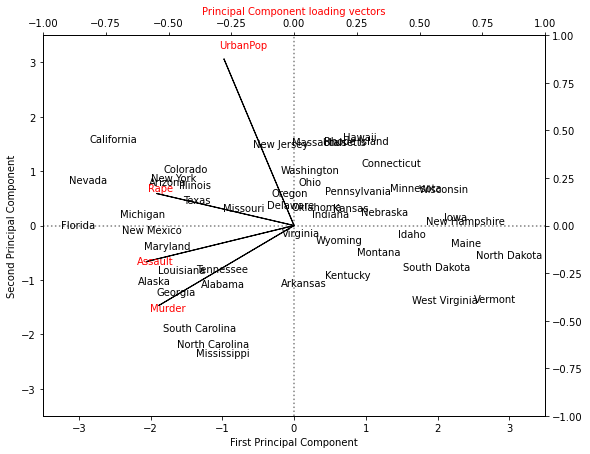

In [17]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Plot Principal Components 1 and 2
for i in df_plot.index:
    ax1.annotate(i, (-df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.set_xlabel('Principal Component loading vectors', color='red')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (-pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='red')

# Plot vectors
ax2.arrow(0,0,-pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,-pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,-pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,-pca_loadings.V1[3], -pca_loadings.V2[3])

La función ${\tt PCA()}$ también genera la varianza explicada por de cada principal
componente. Podemos acceder a estos valores de la siguiente manera:

In [18]:
pca.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

También podemos obtener la proporción de varianza explicada:

In [ ]:
pca.explained_variance_ratio_

Vemos que la primer componente principal explica el 62.0% de la varianza
en los datos, el siguiente componente principal explica el 24,7% de la varianza,
Etc. Podemos graficar el PVE explicado por cada componente de la siguiente manera:

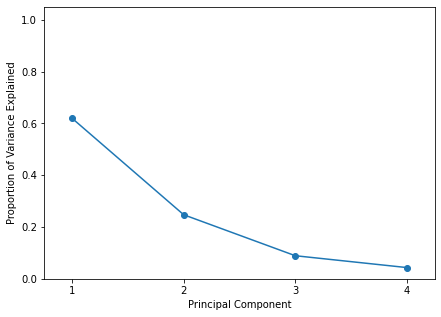

In [20]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], pca.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4]);

También podemos usar la función ${\tt cumsum()}$, que calcula la suma acumulada de los elementos de un vector numérico, para trazar el PVE acumulado:

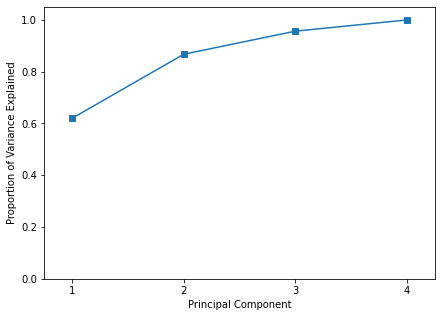

In [21]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_), '-s')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4]);


#  Ejemplo de datos NCI60

Estudiemos los datos de microarrays de líneas celulares de cáncer ${\tt NCI60}$, que
consta de 6830 mediciones de expresión génica en 64 líneas de células cancerosas:

In [22]:
df2 = pd.read_csv('data/NCI60_data.csv').drop('Unnamed: 0', axis=1)
df2.columns = np.arange(df2.columns.size)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Columns: 6830 entries, 0 to 6829
dtypes: float64(6830)
memory usage: 3.3 MB


In [23]:
# Read in the labels to check our work later
y = pd.read_csv('data/NCI60_labs.csv', usecols=[1], skiprows=1, names=['type'])

# PCA en los datos NCI60

Primero realizamos PCA en los datos después de escalar las variables (genes) para que tengan una desviación estándar uno, aunque se podría argumentar razonablemente que
es mejor no escalar los genes:

In [24]:
# Scale the data
X = pd.DataFrame(scale(df2))
X.shape

# Fit the PCA model and transform X to get the principal components
pca2 = PCA()
df2_plot = pd.DataFrame(pca2.fit_transform(X))

We now plot the first few principal component score vectors, in order to
visualize the data. The observations (cell lines) corresponding to a given
cancer type will be plotted in the same color, so that we can see to what
extent the observations within a cancer type are similar to each other:

Ahora graficamos los primeros vectores score de componentes principales, con el fin de
visualizar los datos. Las observaciones (líneas celulares) correspondientes a un determinado tipo de cáncer que se graficará en el mismo color, de modo que podamos ver hasta qué punto las observaciones dentro de un tipo de cáncer son similares entre sí:

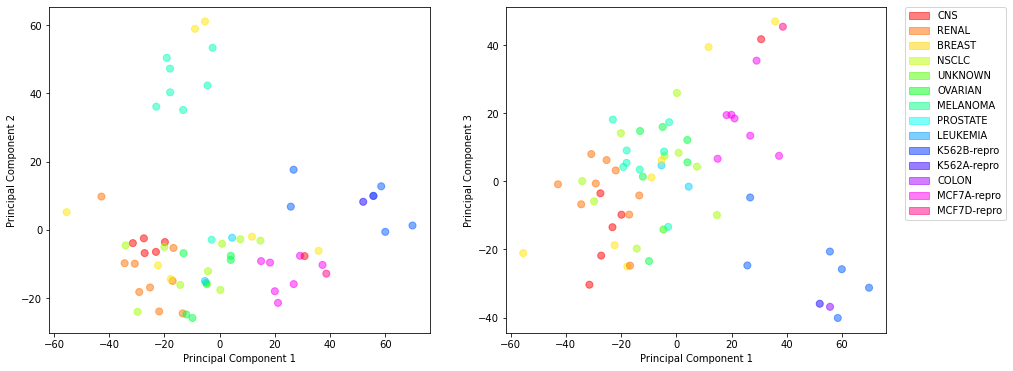

In [25]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))

color_idx = pd.factorize(y.type)[0]
cmap = mpl.cm.hsv

# Left plot
ax1.scatter(df2_plot.iloc[:,0], df2_plot.iloc[:,1], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax1.set_ylabel('Principal Component 2')

# Right plot
ax2.scatter(df2_plot.iloc[:,0], df2_plot.iloc[:,2], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax2.set_ylabel('Principal Component 3')

# Custom legend for the classes (y) since we do not create scatter plots per class (which could have their own labels).
handles = []
labels = pd.factorize(y.type.unique())
norm = mpl.colors.Normalize(vmin=0.0, vmax=14.0)

for i, v in zip(labels[0], labels[1]):
    handles.append(mpl.patches.Patch(color=cmap(norm(i)), label=v, alpha=0.5))

ax2.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# xlabel for both plots
for ax in fig.axes:
    ax.set_xlabel('Principal Component 1') 

En general, las líneas celulares correspondientes a un solo tipo de cáncer tienden a tener valores similares en los primeros vectores score de las componentes principales. Esto indica que las líneas celulares del mismo tipo de cáncer tienden a tener una expresión génica bastante similar.

Podemos generar un resumen de la proporción de varianza explicada (PVE) de los primeros componentes principales:

In [28]:
pd.DataFrame([df2_plot.iloc[:,:5].std(axis=0, ddof=0).to_numpy(),
              pca2.explained_variance_ratio_[:5],
              np.cumsum(pca2.explained_variance_ratio_[:5])],
             index=['Standard Deviation', 'Proportion of Variance', 'Cumulative Proportion'],
             columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

,PC1,PC2,PC3,PC4,PC5
Standard Deviation,27.853469,21.481355,19.820465,17.032556,15.971807
Proportion of Variance,0.113589,0.067562,0.057518,0.042476,0.037350
Cumulative Proportion,0.113589,0.181151,0.238670,0.281145,0.318495


Usando la función ${\tt plot()}$, también podemos graficar la varianza explicada por la
primeros componentes principales:

In [ ]:
df2_plot.iloc[:,:10].var(axis=0, ddof=0).plot(kind='bar', rot=0)
plt.ylabel('Variances')